### >>>INGESTA DE DATOS

In [17]:
import psycopg2
import pandas as pd

# Credenciales de la base de datos
dbname = "DBInmerso"
user = "postgres"
password = "postgres"
host = "localhost"  # Cambia esto según tu configuración
port = "5432"

# Crear la cadena de conexión
connection_string = f"dbname={dbname} user={user} password={password} host={host} port={port}"

# Intentar establecer la conexión
try:
    with psycopg2.connect(connection_string) as connection:
        # Consulta para concatenar las tablas
        query_concatenar = """
                            SELECT
                                u.dni,
                                u.nombre,
                                u.apellido,
                                u.edad,
                                u.fecha_de_nacimiento,
                                u.id_solicitud,
                                u.usuario_solicitante,
                                u.oficio_especial,
                                r.ingresos,
                                d.grado_dis,
                                fn.tipo_fam_num,
                                p.valoracion_patrimonio,
                                p.coche,
                                p.arrendador,
                                h.resultado_solicitud_t_1,
                                h.resultado_solicitud_t_2,
                                h.viajes_t_1,
                                h.viajes_t_2,
                                h.scoring_ind_participacion_previa,
                                h.suma_viajes_t_1_y_t_2
                            FROM
                                usuarios AS u
                            JOIN renta AS r ON u.dni = r.dni
                            JOIN discapacidad AS d ON u.dni = d.dni
                            JOIN familia_numerosa AS fn ON u.dni = fn.dni
                            JOIN patrimonio AS p ON u.dni = p.dni
                            JOIN historial_usuarios AS h ON u.dni = h.dni;
                        """

        # Crear un DataFrame con los resultados de la consulta concatenada
        df = pd.read_sql_query(query_concatenar, connection)

except psycopg2.Error as e:
    print(f"Error al conectar a la base de datos: {e}")

#>>>>>Ponderaciones<<<<<<#
edad_weight = 0.16666
discapacidad_weight = 0.1666
familia_weight = 0.1666
renta_wheigt = 0.16666
coche_wight = 0.16666
oficio_especial_wight = 0.166666
arrendador_wight = 0.16666

df

C:\Users\DELL\AppData\Local\Temp\ipykernel_26888\1283143563.py:50: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_concatenar, connection)


,dni,nombre,apellido,edad,fecha_de_nacimiento,id_solicitud,usuario_solicitante,oficio_especial,ingresos,grado_dis,tipo_fam_num,valoracion_patrimonio,coche,arrendador,resultado_solicitud_t_1,resultado_solicitud_t_2,viajes_t_1,viajes_t_2,scoring_ind_participacion_previa,suma_viajes_t_1_y_t_2
0,95822412,Narcisa,Heras,62,1928-01-31,52,False,False,2767.0,2,0,2000000.0,True,False,84,73,2,1,58.0,3
1,46913810,Moreno,Sala,70,1950-06-10,458,True,True,4318.0,0,0,439183.0,True,True,88,90,1,1,55.0,2
2,28728463,Bernarda,Terrón,61,1941-09-11,1386,False,True,4991.0,1,1,167742.0,True,True,87,71,2,1,57.0,3
3,83197857,Iris,Carranza,60,1955-01-29,1210,True,False,4806.0,0,1,124157.0,False,True,86,81,2,1,77.0,3
4,66629388,Macarena,Carreras,57,1951-05-26,62,False,True,3233.0,2,2,64249.0,False,False,70,79,1,1,83.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,69148126,Ricarda,Seguí,57,1923-04-25,57629,False,False,2944.0,1,2,291191.0,True,False,81,86,2,1,75.0,3
1496,45113084,Onofre,Bilbao,75,1919-08-27,51689,False,False,3319.0,2,2,417945.0,False,False,82,77,1,2,59.0,3
1497,80439867,Rufina,Salamanca,69,1913-10-02,1372,False,True,3404.0,0,0,42788.0,False,True,78,80,1,2,53.0,3
1498,55405943,Alejandra,Lledó,88,1909-12-08,1072,True,False,854.0,0,0,483367.0,True,True,81,75,2,2,52.0,4


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   dni                               1500 non-null   object 
 1   nombre                            1500 non-null   object 
 2   apellido                          1500 non-null   object 
 3   edad                              1500 non-null   int64  
 4   fecha_de_nacimiento               1500 non-null   object 
 5   id_solicitud                      1500 non-null   int64  
 6   usuario_solicitante               1500 non-null   bool   
 7   oficio_especial                   1500 non-null   bool   
 8   ingresos                          1500 non-null   float64
 9   grado_dis                         1500 non-null   int64  
 10  tipo_fam_num                      1500 non-null   int64  
 11  valoracion_patrimonio             1500 non-null   float64
 12  coche 

### >>>EDAD.SCORE

In [19]:
def puntaje_edad_nueva(edad):
    if edad < 60:
        return 1
    elif 60 <= edad < 70:
        return 20
    elif 70 <= edad < 80:
        return 30
    else:  # Edad >= 80
        return 40

def procesar_edad(df):
    # Copiar el DataFrame para evitar modificar el original
    df_edad = df.copy()

    # Aplicar la función
    df_edad['score_edad'] = df_edad['edad'].apply(puntaje_edad_nueva)

    # Calcular el Min-Max Scaling 
    min_valor = df_edad['score_edad'].min()
    max_valor = df_edad['score_edad'].max()
    rango_deseado = 100
    min_deseado = 0

    df_edad['score_edad_scaled'] = ((df_edad['score_edad'] - min_valor) / (max_valor - min_valor)) * rango_deseado + min_deseado

    # Multiplicar 'score_edad_scaled' por el ponderador
    df_edad['score_edad_weighted'] = df_edad['score_edad_scaled'] * edad_weight
    
    # Devolver el DataFrame con las columnas seleccionadas
    return df_edad[['dni', 'edad', 'score_edad', 'score_edad_scaled','score_edad_weighted']].sort_values(by='dni')

# aplicar funcion
df_edad = procesar_edad(df)
df_edad


,dni,edad,score_edad,score_edad_scaled,score_edad_weighted
55,10076758,75,30,74.358974,12.392667
1290,10171954,58,1,0.000000,0.000000
1192,10196231,79,30,74.358974,12.392667
608,10209961,77,30,74.358974,12.392667
348,10344303,73,30,74.358974,12.392667
...,...,...,...,...,...
1472,99794603,86,40,100.000000,16.666000
144,99913412,70,30,74.358974,12.392667
1286,99929175,76,30,74.358974,12.392667
24,99949389,72,30,74.358974,12.392667


### >>>DISCAPACIDAD.SCORE

In [20]:
def puntaje_discapacidad(grado_dis):
    if grado_dis == 0:
        return 0
    elif grado_dis == 1:
        return 10
    else:  # grado_dis == 2
        return 20

def procesar_discapacidad(df):
    # Copiar el DataFrame para evitar modificar el original
    df_discapacidad = df.copy()

    # Aplicar la función 
    df_discapacidad['score_discapacidad'] = df_discapacidad['grado_dis'].apply(puntaje_discapacidad)

    # Calcular el Min-Max Scaling 
    min_valor = df_discapacidad['score_discapacidad'].min()
    max_valor = df_discapacidad['score_discapacidad'].max()
    rango_deseado = 100
    min_deseado = 0

    df_discapacidad['score_discapacidad_scaled'] = ((df_discapacidad['score_discapacidad'] - min_valor) / (max_valor - min_valor)) * rango_deseado + min_deseado

    df_discapacidad['score_discapacidad_weighted'] = df_discapacidad['score_discapacidad_scaled'] * discapacidad_weight
    
    # Devolver el DataFrame con las columnas seleccionadas
    return df_discapacidad[['dni', 'score_discapacidad', 'score_discapacidad_scaled','score_discapacidad_weighted']].sort_values(by='dni')

# aplicar funcion
df_discapacidad = procesar_discapacidad(df)
df_discapacidad

,dni,score_discapacidad,score_discapacidad_scaled,score_discapacidad_weighted
55,10076758,20,100.0,16.66
1290,10171954,10,50.0,8.33
1192,10196231,20,100.0,16.66
608,10209961,0,0.0,0.00
348,10344303,20,100.0,16.66
...,...,...,...,...
1472,99794603,10,50.0,8.33
144,99913412,0,0.0,0.00
1286,99929175,0,0.0,0.00
24,99949389,10,50.0,8.33


### >>>SCORE FAMILIA NUMEROSA

In [21]:
def puntaje_familia(tipo_fam_num):
    if tipo_fam_num == 0:
        return 0
    elif tipo_fam_num == 1:
        return 5
    else:  # tipo_fam_num == 2
        return 10

def procesar_familia(df):
    # Copiar el DataFrame para evitar modificar el original
    df_familia = df.copy()

    # Aplicar la función 
    df_familia['score_familia'] = df_familia['tipo_fam_num'].apply(puntaje_familia)

    # Calcular el Min-Max Scaling 
    min_valor = df_familia['score_familia'].min()
    max_valor = df_familia['score_familia'].max()
    rango_deseado = 100
    min_deseado = 0

    df_familia['score_familia_scaled'] = ((df_familia['score_familia'] - min_valor) / (max_valor - min_valor)) * rango_deseado + min_deseado

    df_familia['score_familia_weighted'] = df_familia['score_familia_scaled'] * familia_weight
    
    # Devolver el DataFrame con las columnas seleccionadas
    return df_familia[['dni', 'score_familia', 'score_familia_scaled','score_familia_weighted']].sort_values(by='dni')

# aplicar funcion
df_familia = procesar_familia(df)
df_familia

,dni,score_familia,score_familia_scaled,score_familia_weighted
55,10076758,0,0.0,0.00
1290,10171954,10,100.0,16.66
1192,10196231,10,100.0,16.66
608,10209961,5,50.0,8.33
348,10344303,5,50.0,8.33
...,...,...,...,...
1472,99794603,0,0.0,0.00
144,99913412,0,0.0,0.00
1286,99929175,10,100.0,16.66
24,99949389,0,0.0,0.00


### >>>COCHE - ARRENDADOR - OFICIO ESPECIAL

In [22]:
def puntaje_coche_arrendador_oficio(coche_arrendador_oficio):
    if coche_arrendador_oficio == True:
        return 100
    else:  #  == False
        return 0


def procesar_coche_arrendador_oficio(df):
    # Copiar el DataFrame para evitar modificar el original
    df_coche_arrendador_oficio = df.copy()

    # Aplicar la función 
    df_coche_arrendador_oficio['score_coche'] = df_coche_arrendador_oficio['coche'].apply(puntaje_coche_arrendador_oficio)
    df_coche_arrendador_oficio['score_arrendador'] = df_coche_arrendador_oficio['arrendador'].apply(puntaje_coche_arrendador_oficio)
    df_coche_arrendador_oficio['score_oficio_especial'] = df_coche_arrendador_oficio['oficio_especial'].apply(puntaje_coche_arrendador_oficio)


    df_coche_arrendador_oficio['score_coche_weighted'] = df_coche_arrendador_oficio['score_coche'] * coche_wight
    df_coche_arrendador_oficio['score_arrendador_weighted'] = df_coche_arrendador_oficio['score_arrendador'] * arrendador_wight
    df_coche_arrendador_oficio['score_oficio_especial_weighted'] = df_coche_arrendador_oficio['score_oficio_especial'] * oficio_especial_wight
     
    # Devolver el DataFrame con las columnas seleccionadas
    return df_coche_arrendador_oficio[['dni', 'score_coche', 'score_coche_weighted','score_arrendador','score_arrendador_weighted','score_oficio_especial', 'score_oficio_especial_weighted','fecha_de_nacimiento','id_solicitud' ]].sort_values(by='dni')


# aplicar funcion
df_coche_arrendador_oficio = procesar_coche_arrendador_oficio(df)
df_coche_arrendador_oficio

,dni,score_coche,score_coche_weighted,score_arrendador,score_arrendador_weighted,score_oficio_especial,score_oficio_especial_weighted,fecha_de_nacimiento,id_solicitud
55,10076758,100,16.666,0,0.000,0,0.0000,1931-10-26,1001
1290,10171954,100,16.666,100,16.666,100,16.6666,1916-09-02,791
1192,10196231,100,16.666,0,0.000,0,0.0000,1932-07-12,37351
608,10209961,0,0.000,0,0.000,0,0.0000,1923-02-02,33532
348,10344303,0,0.000,0,0.000,0,0.0000,1926-09-27,1487
...,...,...,...,...,...,...,...,...,...
1472,99794603,0,0.000,0,0.000,0,0.0000,1934-05-17,35037
144,99913412,100,16.666,100,16.666,0,0.0000,1920-12-06,547
1286,99929175,100,16.666,100,16.666,0,0.0000,1933-01-15,38236
24,99949389,0,0.000,100,16.666,100,16.6666,1911-10-21,51018


### >>>PARTICIPACION PREVIA

In [25]:
def participacion_previa(resultado_t_1, suma_viajes_t_1y_t_2, viajes_t_1, viajes_t_2):
    if resultado_t_1 == 2:
        return 175
    elif suma_viajes_t_1y_t_2 == 0:
        return 50
    elif viajes_t_1 == 0 and viajes_t_2 > 0:
        return 40
    elif viajes_t_1 > 0 and viajes_t_2 == 0:
        return 20
    elif viajes_t_1 + viajes_t_2 != 0:
        if suma_viajes_t_1y_t_2 >= 3:
            return 0
    else:
        return 10

def procesar_participacion_previa(df):
    # Copiar el DataFrame para evitar modificar el original
    df_participacion_previa = df.copy()

    # Aplicar la función
    df_participacion_previa['score_participacion_previa'] = df_participacion_previa.apply(
        lambda row: participacion_previa(row['resultado_solicitud_t_1'], row['suma_viajes_t_1_y_t_2'], row['viajes_t_1'], row['viajes_t_2']),
        axis=1
    )

    # Calcular el Min-Max Scaling 
    min_valor = df_participacion_previa['score_participacion_previa'].min()
    max_valor = df_participacion_previa['score_participacion_previa'].max()
    rango_deseado = 100
    min_deseado = 0

    df_participacion_previa['score_participacion_previa_scaled'] = (
        (df_participacion_previa['score_participacion_previa'] - min_valor) / (max_valor - min_valor)
    ) * rango_deseado + min_deseado

    df_participacion_previa['score_participacion_previa_weighted'] = (
        df_participacion_previa['score_participacion_previa_scaled'] * familia_weight
    )
    
    # Devolver el DataFrame con las columnas seleccionadas
    return df_participacion_previa[[
        'dni', 
        'score_participacion_previa', 
        'score_participacion_previa_scaled',
        'score_participacion_previa_weighted'
    ]].sort_values(by='dni')

# Aplicar la función
df_participacion_previa = procesar_participacion_previa(df)
df_participacion_previa



,dni,score_participacion_previa,score_participacion_previa_scaled,score_participacion_previa_weighted
55,10076758,0.0,NaN,NaN
1290,10171954,NaN,NaN,NaN
1192,10196231,0.0,NaN,NaN
608,10209961,0.0,NaN,NaN
348,10344303,0.0,NaN,NaN
...,...,...,...,...
1472,99794603,NaN,NaN,NaN
144,99913412,0.0,NaN,NaN
1286,99929175,0.0,NaN,NaN
24,99949389,NaN,NaN,NaN


### >>>MERGE 

In [ ]:
#Merge de dataframes
score_merged = pd.merge(df_edad, df_discapacidad, on='dni', how='inner')\
              .merge(df_coche_arrendador_oficio, on='dni', how='inner')\
              .merge(df_familia, on='dni', how='inner')


# seleccion de columnas que terminan en '_weighted'
columnas_weighted = [col for col in score_merged.columns if col.endswith('_weighted')]

# Crea la nueva columna 'score_total' sumando todas las columnas '_weighted'
score_merged['score_total'] = score_merged[columnas_weighted].sum(axis=1)



score_merged = score_merged.sort_values(by='score_total', ascending=False)



#Seleccion de variables weighted y otras
score_merged_weighted = score_merged.loc[:, [
                                            'id_solicitud' ,
                                            'score_total',
                                            'score_edad_weighted',
                                            'score_discapacidad_weighted',
                                            'score_coche_weighted',
                                            'score_arrendador_weighted',
                                            'score_oficio_especial_weighted',
                                            'score_familia_weighted']]



score_merged_weighted_rename = {

    'id_solicitud': 'id_solicitud',
    'score_total': 'score',
    'score_edad_weighted': 'edad_score',
    'score_discapacidad_weighted': 'discapacidad_score',
    'score_coche_weighted': 'coche_score',
    'score_arrendador_weighted': 'arrendador_score',
    'score_oficio_especial_weighted': 'oficio_especial_score',
    'score_familia_weighted': 'familia_score'
    
}

# Renombrar todas las columnas
score_merged_weighted = score_merged_weighted.rename(columns=score_merged_weighted_rename)


score_merged_weighted

,id_solicitud,score,edad_score,discapacidad_score,coche_score,arrendador_score,oficio_especial_score,familia_score
661,1380,99.984600,16.666000,16.66,16.666,16.666,16.6666,16.66
322,80,99.984600,16.666000,16.66,16.666,16.666,16.6666,16.66
853,354,99.984600,16.666000,16.66,16.666,16.666,16.6666,16.66
1145,48425,99.984600,16.666000,16.66,16.666,16.666,16.6666,16.66
736,1224,95.711267,12.392667,16.66,16.666,16.666,16.6666,16.66
...,...,...,...,...,...,...,...,...
453,1168,0.000000,0.000000,0.00,0.000,0.000,0.0000,0.00
1030,1480,0.000000,0.000000,0.00,0.000,0.000,0.0000,0.00
103,419,0.000000,0.000000,0.00,0.000,0.000,0.0000,0.00
182,225,0.000000,0.000000,0.00,0.000,0.000,0.0000,0.00


### >>>EVALUACION DEL MODELO

In [ ]:
score_merged_weighted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1500 entries, 661 to 61
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_solicitud           1500 non-null   int64  
 1   score                  1500 non-null   float64
 2   edad_score             1500 non-null   float64
 3   discapacidad_score     1500 non-null   float64
 4   coche_score            1500 non-null   float64
 5   arrendador_score       1500 non-null   float64
 6   oficio_especial_score  1500 non-null   float64
 7   familia_score          1500 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 105.5 KB


  Score Range  Número de Usuarios  Porcentaje
4        0-20                  61    4.066667
2       21-40                 311   20.733333
0       41-60                 701   46.733333
1       61-80                 353   23.533333
3      81-100                  68    4.533333


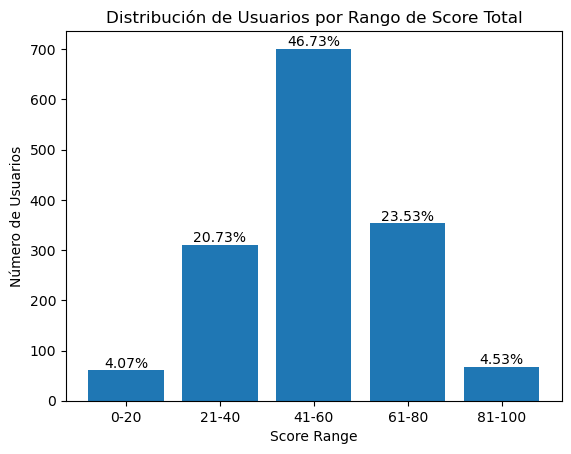

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear rangos para los puntajes
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']

# Agregar una nueva columna 'score_range' al DataFrame
score_merged_weighted['score_range'] = pd.cut(score_merged_weighted['score'], bins=bins, labels=labels)

# Contar usuarios por rango de score
usuarios_por_rango = score_merged_weighted['score_range'].value_counts().reset_index()

# Renombrar las columnas
usuarios_por_rango.columns = ['Score Range', 'Número de Usuarios']

# Calcular el porcentaje de usuarios en cada rango
total_usuarios = len(score_merged_weighted)
usuarios_por_rango['Porcentaje'] = (usuarios_por_rango['Número de Usuarios'] / total_usuarios) * 100

# Ordenar por 'Score Range'
usuarios_por_rango = usuarios_por_rango.sort_values('Score Range')

# Mostrar la tabla
print(usuarios_por_rango)

# Gráfico de barras para visualizar la distribución
plt.bar(usuarios_por_rango['Score Range'], usuarios_por_rango['Número de Usuarios'])
plt.title('Distribución de Usuarios por Rango de Score Total')
plt.xlabel('Score Range')
plt.ylabel('Número de Usuarios')

# Agregar porcentajes en el gráfico
for i, porcentaje in enumerate(usuarios_por_rango['Porcentaje']):
    plt.text(i, usuarios_por_rango['Número de Usuarios'].iloc[i] + 5, f'{porcentaje:.2f}%', ha='center')

plt.show()
